Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/thread_ring/3/'

N = 1_000_000
R = 1_000_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 8 05:16:10 2025 +0200) (509.79ms elap...,0.1320,0.0000,0.258,0.30,0.05,3.29,46.54 C,Nominal
1,(Tue Apr 8 05:16:11 2025 +0200) (509.85ms elap...,1.2100,0.0339,0.374,1.60,0.30,24.11,46.54 C,Nominal
2,(Tue Apr 8 05:16:11 2025 +0200) (508.99ms elap...,0.0705,0.0000,0.272,0.22,0.04,2.60,46.59 C,Nominal
3,(Tue Apr 8 05:16:12 2025 +0200) (507.43ms elap...,0.4310,0.0000,0.287,0.69,0.12,8.79,46.59 C,Nominal
4,(Tue Apr 8 05:16:12 2025 +0200) (505.82ms elap...,4.3600,0.0000,0.531,4.85,0.73,56.09,46.18 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(4969, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 8 05:16:22 2025 +0200) (1007.17ms ela...,37.3,0.0,1.560,39.20,3.96,99.39,48.45 C,Nominal
1,(Tue Apr 8 05:16:23 2025 +0200) (1004.06ms ela...,34.9,0.0,1.020,37.92,3.88,97.89,51.62 C,Nominal
2,(Tue Apr 8 05:16:24 2025 +0200) (1004.07ms ela...,36.2,0.0,1.540,39.64,3.96,99.31,54.72 C,Nominal
3,(Tue Apr 8 05:16:25 2025 +0200) (1005.43ms ela...,34.1,0.0,0.956,36.94,3.85,98.14,56.59 C,Nominal
4,(Tue Apr 8 05:16:26 2025 +0200) (1005.83ms ela...,35.5,0.0,1.540,38.98,3.94,99.21,59.03 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 7 22:30:24 2025 +0200) (509.30ms elap...,0.2790,0.0000,0.254,0.47,0.07,5.25,59.32 C,Nominal
1,(Mon Apr 7 22:30:25 2025 +0200) (508.38ms elap...,0.2000,0.0333,0.385,0.54,0.09,7.00,59.32 C,Nominal
2,(Mon Apr 7 22:30:25 2025 +0200) (506.09ms elap...,1.0400,0.0000,0.262,1.22,0.15,12.28,59.24 C,Nominal
3,(Mon Apr 7 22:30:26 2025 +0200) (509.29ms elap...,0.0922,0.0000,0.277,0.37,0.05,3.18,59.24 C,Nominal
4,(Mon Apr 7 22:30:26 2025 +0200) (508.15ms elap...,0.8130,0.4160,0.471,1.61,0.25,14.55,59.12 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(5808, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 7 22:30:36 2025 +0200) (1010.11ms ela...,18.3,0.0,0.706,19.12,2.28,96.08,57.89 C,Nominal
1,(Mon Apr 7 22:30:37 2025 +0200) (1006.47ms ela...,17.9,0.0,0.681,18.68,2.24,96.24,58.66 C,Nominal
2,(Mon Apr 7 22:30:38 2025 +0200) (1006.80ms ela...,14.5,0.0,0.884,15.45,1.77,97.85,60.13 C,Nominal
3,(Mon Apr 7 22:30:39 2025 +0200) (1006.50ms ela...,10.1,0.0,1.290,11.26,1.01,99.43,61.35 C,Nominal
4,(Mon Apr 7 22:30:40 2025 +0200) (1006.46ms ela...,10.1,0.0,1.300,11.26,1.01,99.41,62.03 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-08 05:16:10,0.1320,0.0000,0.258,0.30,0.05,3.29,46.54,Nominal,509.79
1,2025-04-08 05:16:11,1.2100,0.0339,0.374,1.60,0.30,24.11,46.54,Nominal,509.85
2,2025-04-08 05:16:11,0.0705,0.0000,0.272,0.22,0.04,2.60,46.59,Nominal,508.99
3,2025-04-08 05:16:12,0.4310,0.0000,0.287,0.69,0.12,8.79,46.59,Nominal,507.43
4,2025-04-08 05:16:12,4.3600,0.0000,0.531,4.85,0.73,56.09,46.18,Nominal,505.82


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(4969, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-08 05:16:22,37.3,0.0,1.560,39.20,3.96,99.39,48.45,Nominal,1007.17
1,2025-04-08 05:16:23,34.9,0.0,1.020,37.92,3.88,97.89,51.62,Nominal,1004.06
2,2025-04-08 05:16:24,36.2,0.0,1.540,39.64,3.96,99.31,54.72,Nominal,1004.07
3,2025-04-08 05:16:25,34.1,0.0,0.956,36.94,3.85,98.14,56.59,Nominal,1005.43
4,2025-04-08 05:16:26,35.5,0.0,1.540,38.98,3.94,99.21,59.03,Nominal,1005.83


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-07 22:30:24,0.2790,0.0000,0.254,0.47,0.07,5.25,59.32,Nominal,509.30
1,2025-04-07 22:30:25,0.2000,0.0333,0.385,0.54,0.09,7.00,59.32,Nominal,508.38
2,2025-04-07 22:30:25,1.0400,0.0000,0.262,1.22,0.15,12.28,59.24,Nominal,506.09
3,2025-04-07 22:30:26,0.0922,0.0000,0.277,0.37,0.05,3.18,59.24,Nominal,509.29
4,2025-04-07 22:30:26,0.8130,0.4160,0.471,1.61,0.25,14.55,59.12,Nominal,508.15


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(5808, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-07 22:30:36,18.3,0.0,0.706,19.12,2.28,96.08,57.89,Nominal,1010.11
1,2025-04-07 22:30:37,17.9,0.0,0.681,18.68,2.24,96.24,58.66,Nominal,1006.47
2,2025-04-07 22:30:38,14.5,0.0,0.884,15.45,1.77,97.85,60.13,Nominal,1006.80
3,2025-04-07 22:30:39,10.1,0.0,1.290,11.26,1.01,99.43,61.35,Nominal,1006.50
4,2025-04-07 22:30:40,10.1,0.0,1.300,11.26,1.01,99.41,62.03,Nominal,1006.46


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


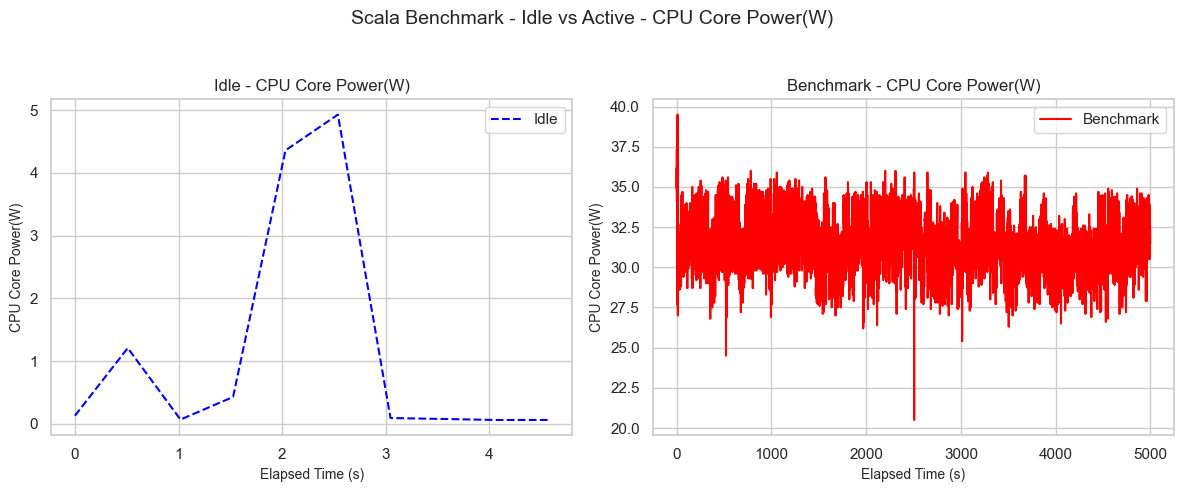

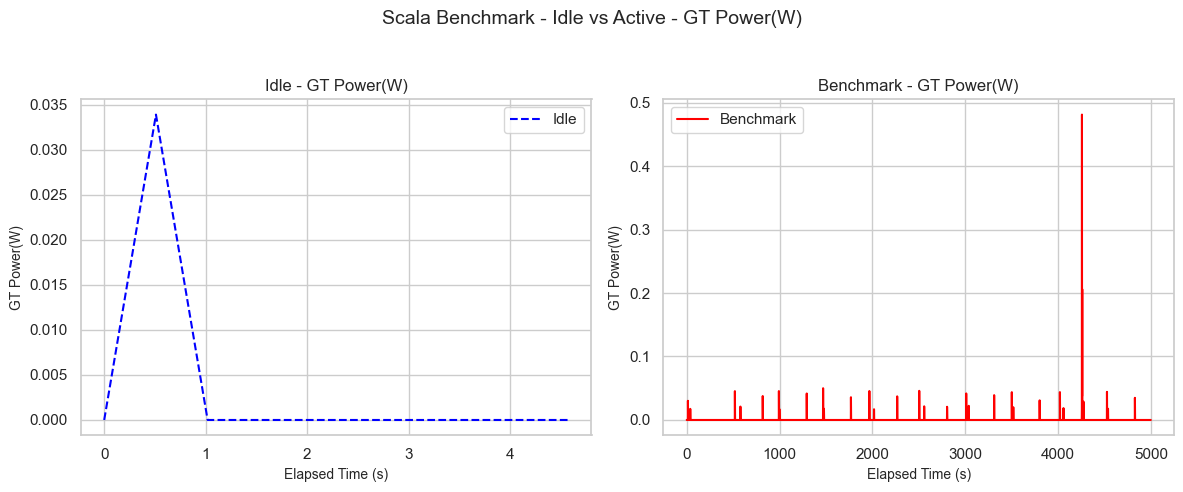

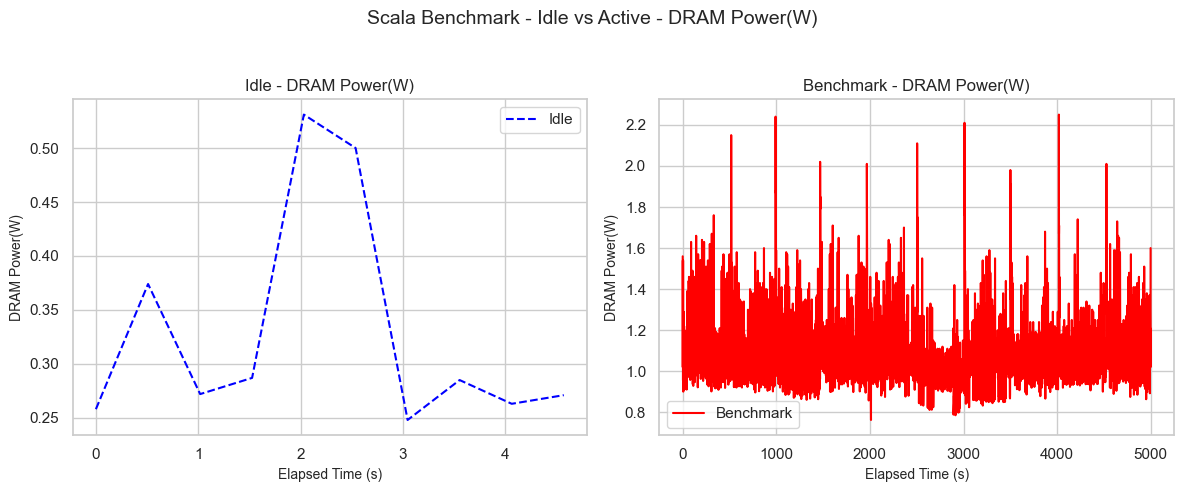

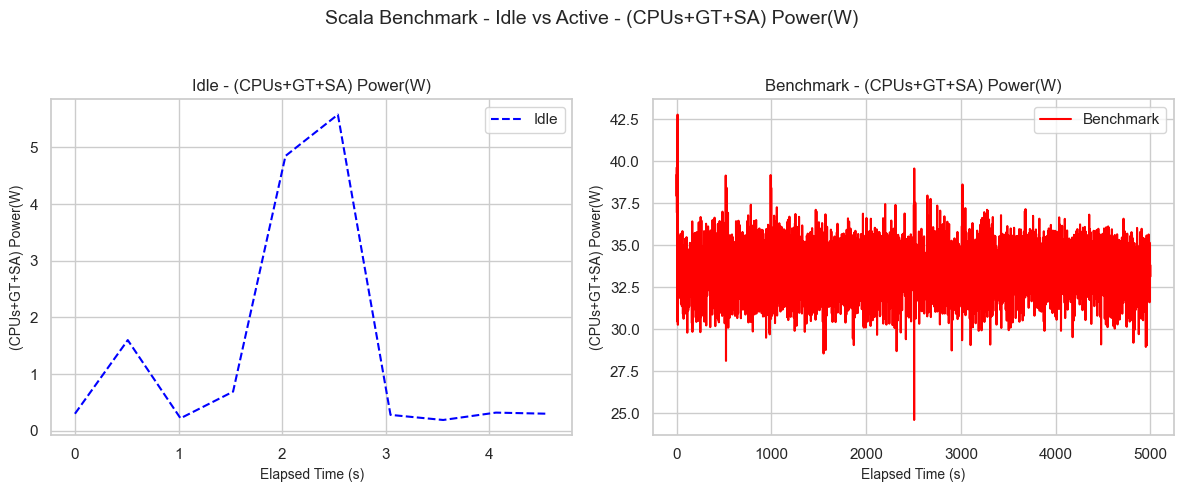

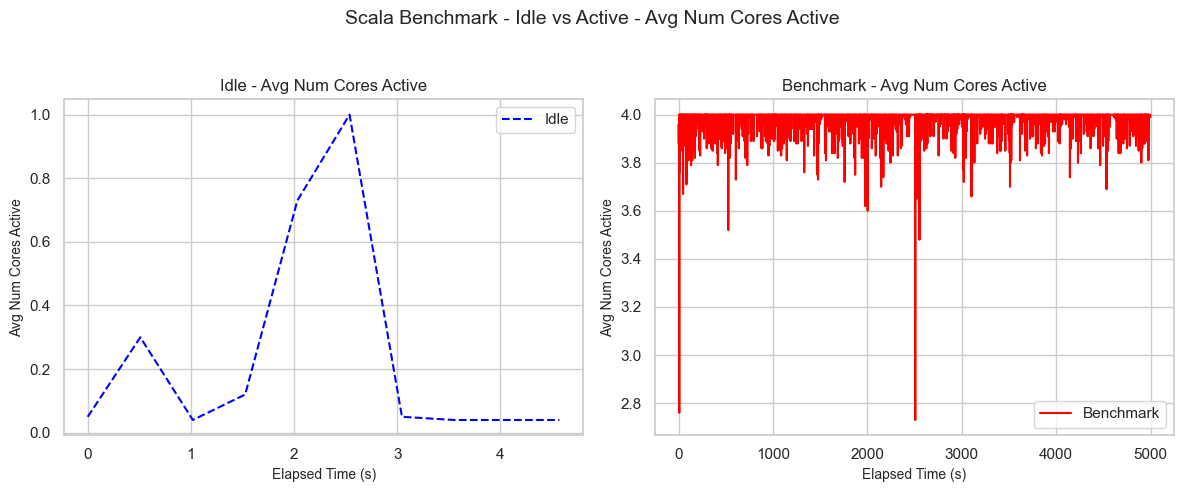

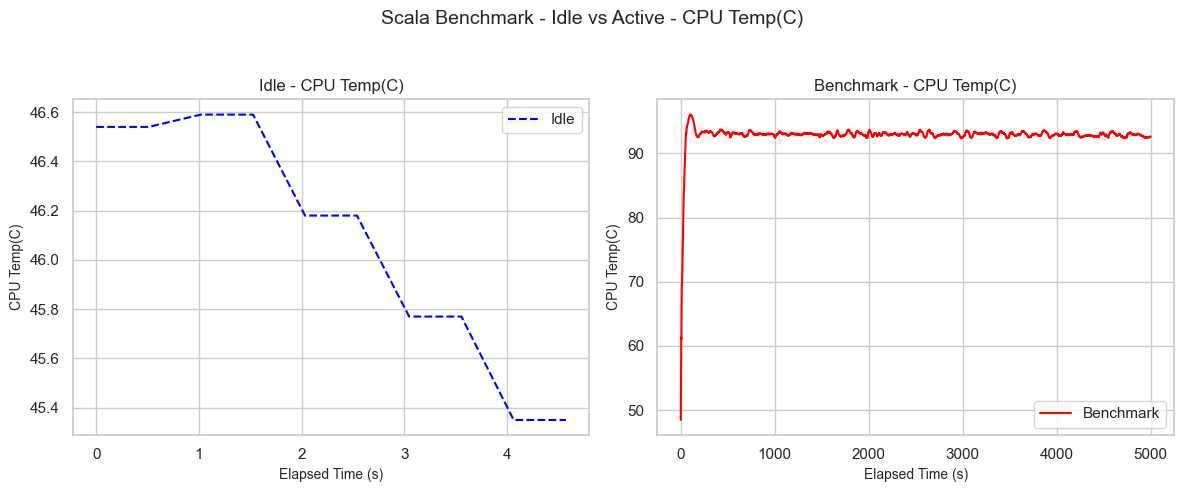

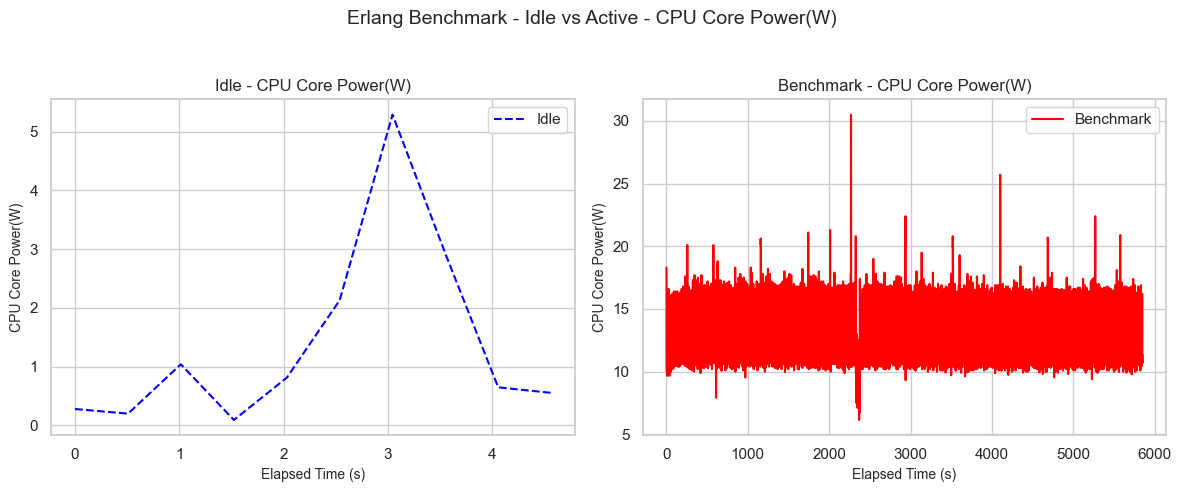

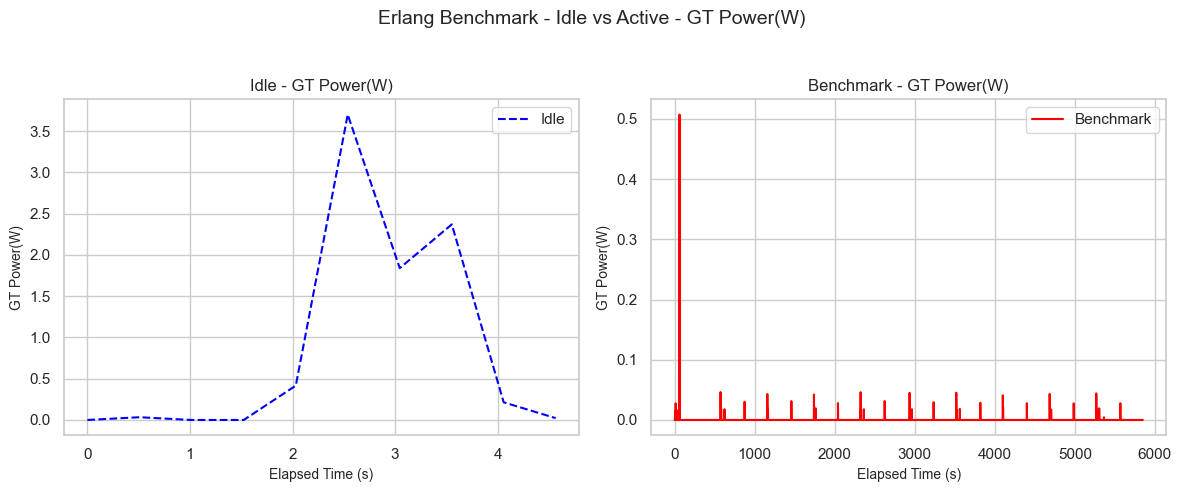

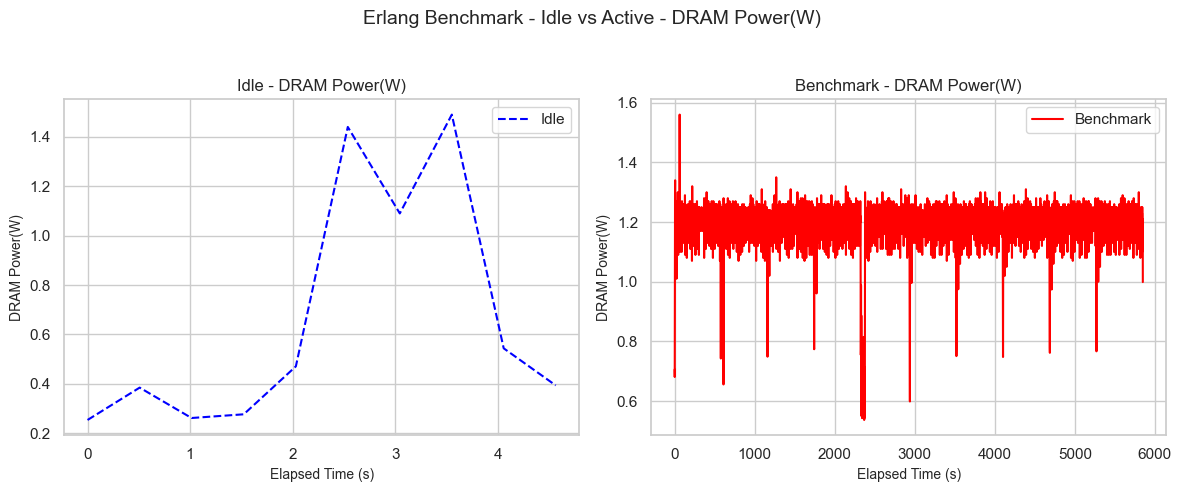

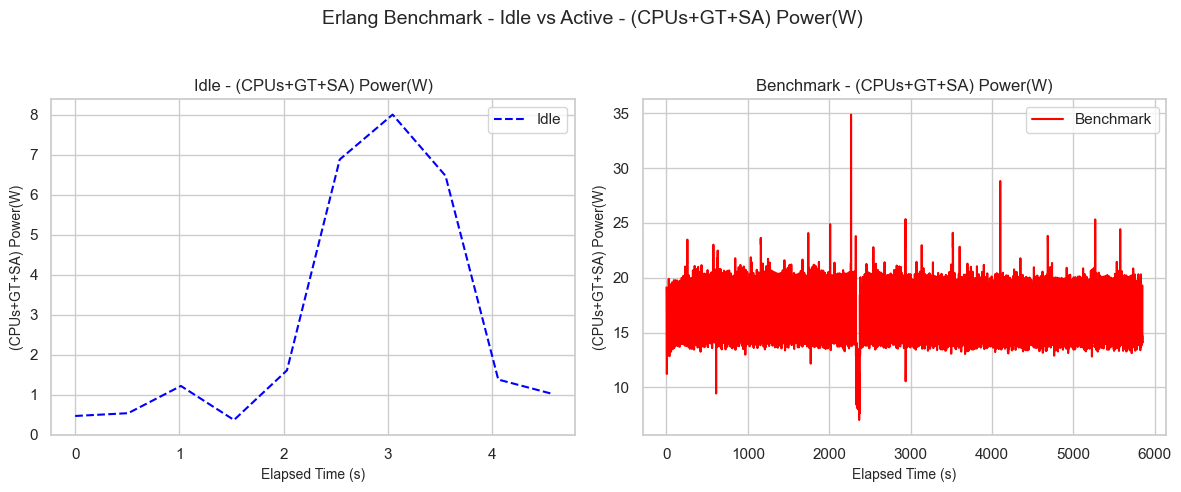

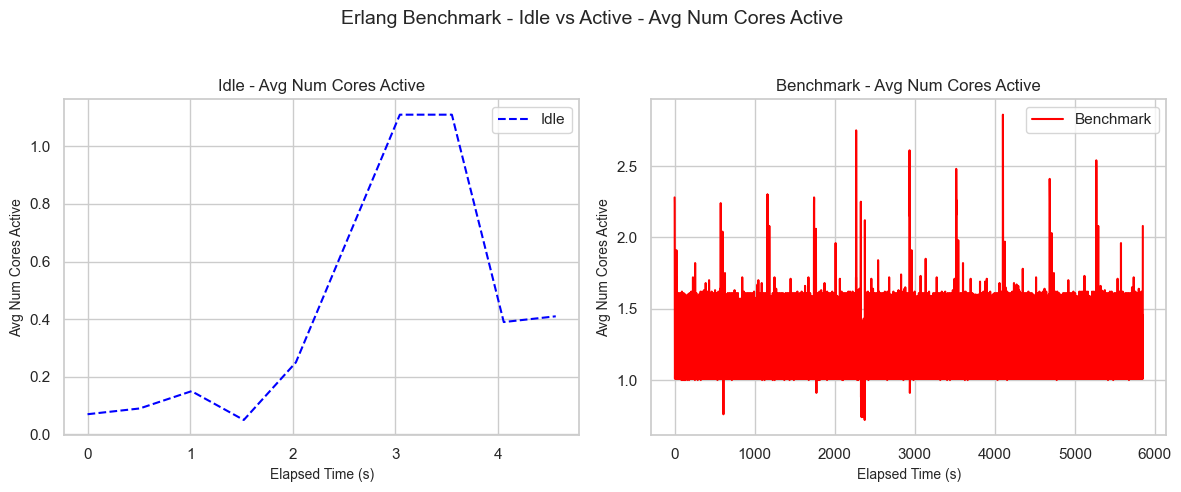

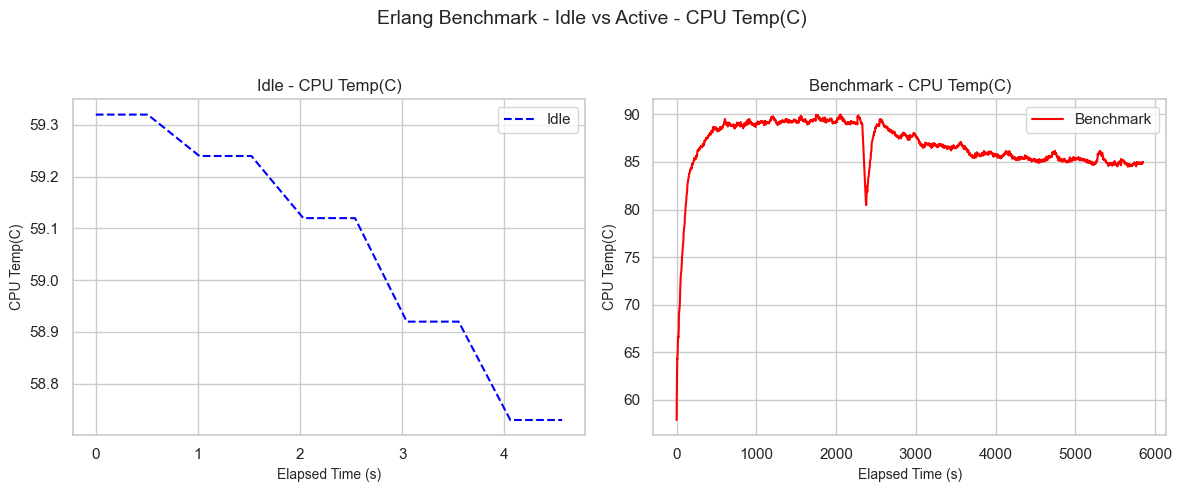

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

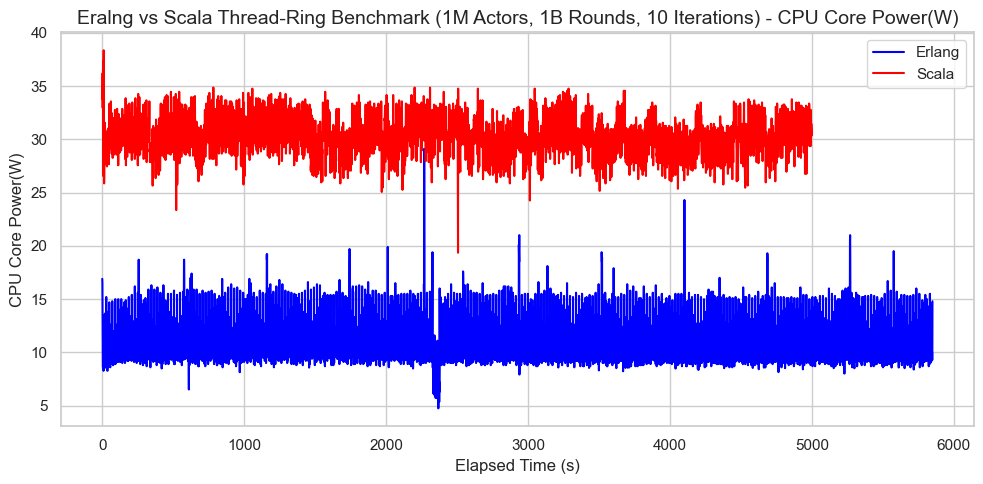

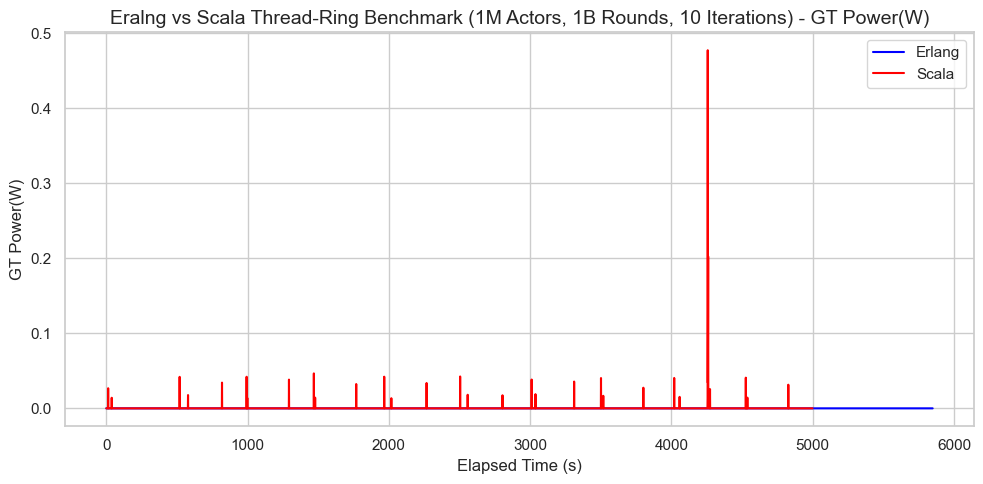

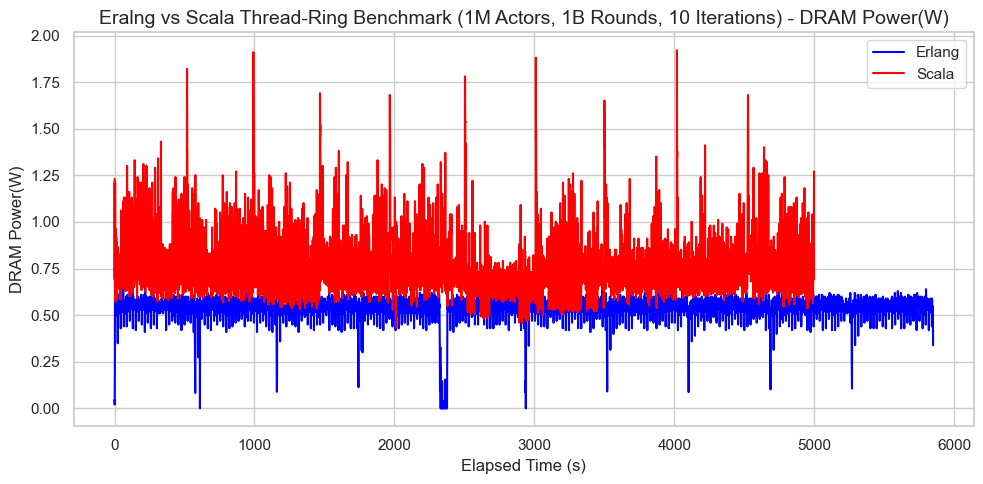

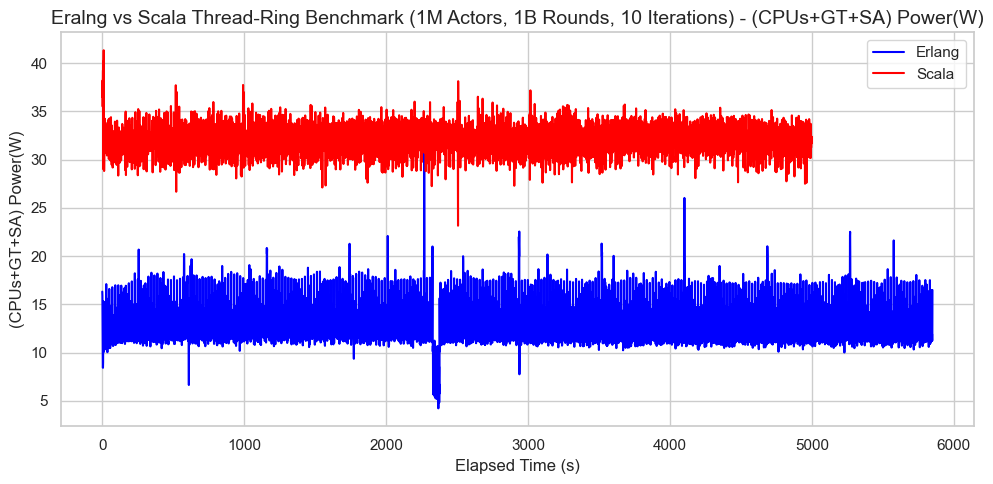

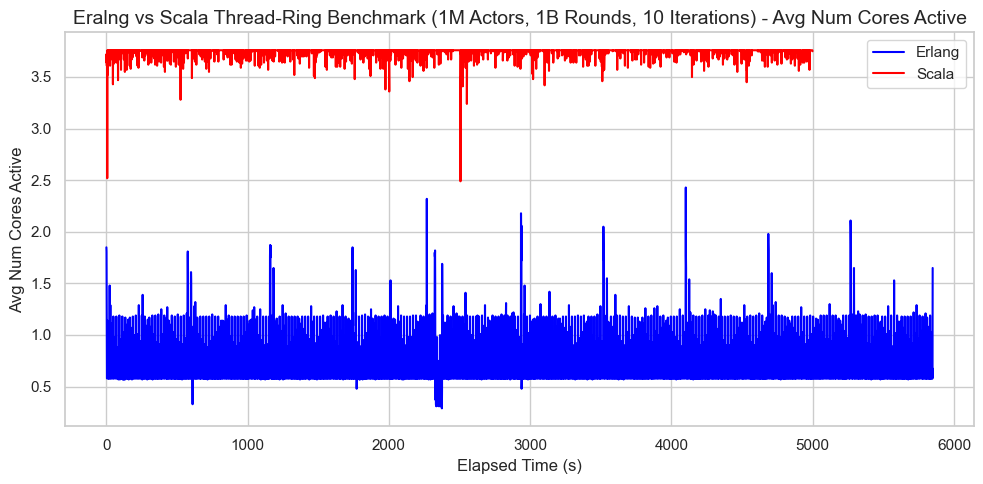

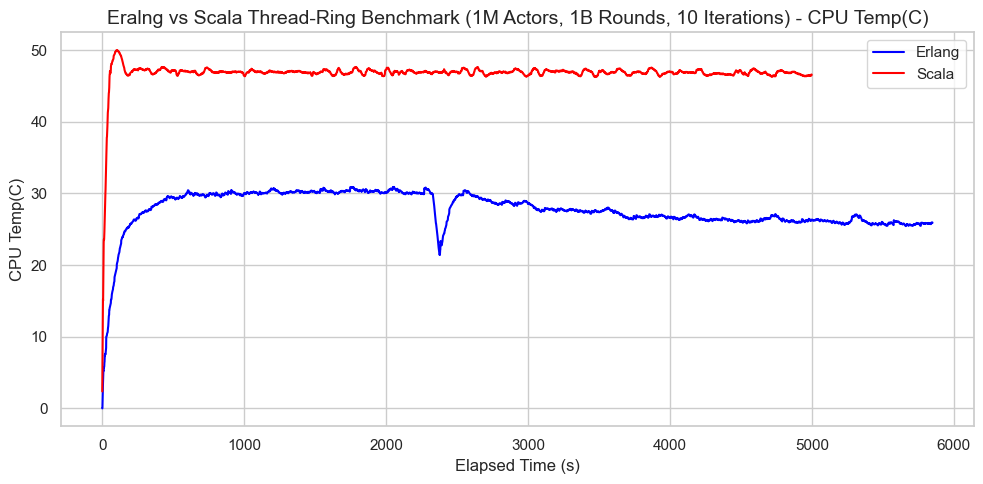

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.208000
GT Power(W)              -0.003019
DRAM Power(W)             0.744077
(CPUs+GT+SA) Power(W)    31.954185
CPU Temp(C)              46.781307
Avg Num Cores Active      3.747970
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        10.217084
GT Power(W)              -0.859279
DRAM Power(W)             0.532809
(CPUs+GT+SA) Power(W)    12.178372
CPU Temp(C)              27.674172
Avg Num Cores Active      0.663962
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/3/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 154741.59273883593 Joules
Erlang Benchmark: 62887.731372935785 Joules
